In [1]:
import pandas as pd
import datetime
import sys

In [2]:
df = pd.read_pickle('../df_data/df_articles.pkl')
df = df.set_index(['publishedAt'])

# df_source

In [3]:
df_source = pd.DataFrame(df['source_id'], columns=['source_id'])
df_source['source_id'] = df_source['source_id'].astype('category')
df_source = pd.get_dummies(df_source['source_id'])
df_source = df_source.resample('D').sum()
df_source = df_source.sort_index(ascending=False)

In [4]:
df_source.head()

,+tribeca-film-festival,24/7-wall-st.,99bitcoins.com,abacus,acm.org,adafruit.com,apkmania.live,ars-technica,askubuntu.com,bangkok-post,...,wccftech,whtc-news,wnd.com,wordpress.com,wptavern.com,wykop.pl,yahoo-entertainment,yanko-design,youtube,zerohedge.com
publishedAt,,,,,,,,,,,,,,,,,,,,,
2020-06-15,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
2020-06-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
2020-06-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2020-06-12,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
2020-06-11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,14,0,1,0


# df_clean

## add keyword columns

In [5]:
df_clean = df.copy()

In [6]:
df_clean['crypto'] = df_clean['title'].str.contains('crypto', case=False)
df_clean['bitcoin'] = df_clean['title'].str.contains('bitcoin', case=False)
df_clean['ethereum'] = df_clean['title'].str.contains('ethereum', case=False)

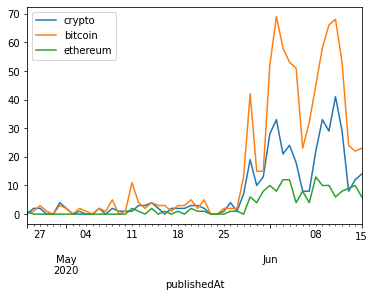

In [7]:
df_count = df_clean[['crypto','bitcoin','ethereum']]
df_count = df_count.resample('D').sum()
df_count = df_count.sort_index(ascending=False)
df_count.plot()

## clean `df['author']`

In [8]:
df_clean['author'] = df['author'].str.split(',', expand=True)[0]
df_clean['author'] = df_clean['author'].str.replace('Cointelegraph By ','')
df_clean['author'] = df_clean['author'].str.replace(')','')
df_clean['author'] = df_clean['author'].str.split('(', expand=True)[0]

## clean `df['description']`

In [9]:
for i,v in enumerate(df_clean['description']):
    if str(v).endswith('…'):
        df_clean['description'][i] = v[:-1]

C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## clean `df['content']`

In [10]:
for i,v in enumerate(df_clean['content']):
    if str(v).endswith(' chars]'):
        df_clean['content'][i] = v[:-16]

C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df_clean.head()

,source,source_id,author,title,description,content,url,crypto,bitcoin,ethereum
publishedAt,,,,,,,,,,
2020-04-25 15:14:11,Forbes,forbes,Biser Dimitrov,Big Four Accounting Firm Wants To Empower Ente...,Using the public Ethereum blockchain for enter...,"Paul Brody, Global Blockchain Innovation Leade...",https://www.forbes.com/sites/biserdimitrov/202...,False,False,True
2020-04-26 09:57:47,Bloomberg,bloomberg,None,Swiss 'Crypto Valley' In Talks for More Financ...,None,None,https://www.bloomberg.com/news/articles/2020-0...,True,False,False
2020-04-26 15:10:25,Forbes,forbes,Crypto Confidential,Bitcoin Hits April High; Crypto Portfolios Get...,"The number of deposits of exactly $1,200 more ...",Get Forbes' top crypto and blockchain stories ...,https://www.forbes.com/sites/cryptoconfidentia...,True,True,False
2020-04-27 01:15:47,CoinDesk,coindesk,Noelle Acheson,Crypto Long & Short: How Oil Going Negative Co...,The economic repercussions of oil going negati...,This will always be remembered as the week whe...,https://www.coindesk.com/oil-going-negative-bi...,True,True,False
2020-04-27 06:46:25,Forbes,forbes,Luke Fitzpatrick,Bitcoin Halving: A New Class Of Bitcoin Millio...,The third bitcoin halving could be a major cat...,The photo shows a physical imitation of a Bitc...,https://www.forbes.com/sites/lukefitzpatrick/2...,False,True,False


# df_scores

## Calculate Sentiment Scores

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
analyzer = SentimentIntensityAnalyzer()

In [14]:
df_clean['t_score'] = pd.Series()
for i,v in enumerate(df_clean['title']):
    vs = analyzer.polarity_scores(v)
    df_clean['t_score'][i] = vs['compound'] 

C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df_clean['d_score'] = pd.Series(dtype='float')
for i,v in enumerate(df_clean['description']):
    try:
        vs = analyzer.polarity_scores(v)
        df_clean['d_score'][i] = vs['compound']
    except:
        df_clean['d_score'][i] = 0

C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
df_clean['c_score'] = pd.Series()
for i,v in enumerate(df_clean['content']):
    try:
        vs = analyzer.polarity_scores(v)
        df_clean['c_score'][i] = vs['compound']
    except:
        df_clean['c_score'][i] = 0

C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\manoh\anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Add scores to df_clean

In [17]:
df_clean['avg_score'] = (df_clean['t_score'] + df_clean['d_score'] + df_clean['c_score']) / 3

In [18]:
df_clean.head()

,source,source_id,author,title,description,content,url,crypto,bitcoin,ethereum,t_score,d_score,c_score,avg_score
publishedAt,,,,,,,,,,,,,,
2020-04-25 15:14:11,Forbes,forbes,Biser Dimitrov,Big Four Accounting Firm Wants To Empower Ente...,Using the public Ethereum blockchain for enter...,"Paul Brody, Global Blockchain Innovation Leade...",https://www.forbes.com/sites/biserdimitrov/202...,False,False,True,0.0000,0.4215,0.1531,0.191533
2020-04-26 09:57:47,Bloomberg,bloomberg,None,Swiss 'Crypto Valley' In Talks for More Financ...,None,None,https://www.bloomberg.com/news/articles/2020-0...,True,False,False,0.4549,0.0000,0.0000,0.151633
2020-04-26 15:10:25,Forbes,forbes,Crypto Confidential,Bitcoin Hits April High; Crypto Portfolios Get...,"The number of deposits of exactly $1,200 more ...",Get Forbes' top crypto and blockchain stories ...,https://www.forbes.com/sites/cryptoconfidentia...,True,True,False,0.0000,0.0772,0.2023,0.093167
2020-04-27 01:15:47,CoinDesk,coindesk,Noelle Acheson,Crypto Long & Short: How Oil Going Negative Co...,The economic repercussions of oil going negati...,This will always be remembered as the week whe...,https://www.coindesk.com/oil-going-negative-bi...,True,True,False,-0.5719,0.2960,-0.3291,-0.201667
2020-04-27 06:46:25,Forbes,forbes,Luke Fitzpatrick,Bitcoin Halving: A New Class Of Bitcoin Millio...,The third bitcoin halving could be a major cat...,The photo shows a physical imitation of a Bitc...,https://www.forbes.com/sites/lukefitzpatrick/2...,False,True,False,0.0000,0.0000,0.0000,0.000000


## Daily Sentiment per keyword

In [19]:
len(df_clean.loc[(df_clean['crypto']==True)])

426

In [20]:
len(df_clean.loc[(df_clean['crypto']==True) & (df_clean['avg_score']!=0)]['avg_score'])

380

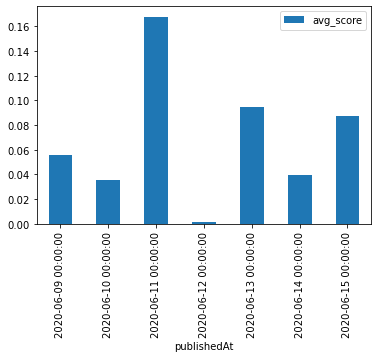

In [40]:
CRY_score = pd.DataFrame(df_clean.loc[(df_clean['crypto']==True) & (df_clean['avg_score']!=0)]['avg_score'])
CRY_score = CRY_score.resample('D').mean()
CRY_score = CRY_score.sort_index(ascending=True)
CRY_score[-7:].plot(kind='bar')

In [44]:
df_daily = df_count

In [46]:
df_daily['CRY_score'] = df_daily.merge(CRY_score, how='outer', on='publishedAt')['avg_score']


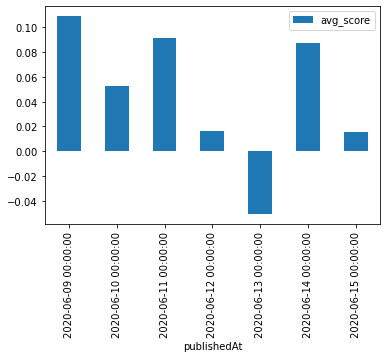

In [22]:
BTC_score = pd.DataFrame(df_clean.loc[(df_clean['bitcoin']==True) & (df_clean['avg_score']!=0)]['avg_score'])
BTC_score = BTC_score.resample('D').mean()
BTC_score = BTC_score.sort_index(ascending=True)
BTC_score[-7:].plot(kind='bar')

In [29]:
df_clean.head(1)

,source,source_id,author,title,description,content,url,crypto,bitcoin,ethereum,t_score,d_score,c_score,avg_score
publishedAt,,,,,,,,,,,,,,
2020-04-25 15:14:11,Forbes,forbes,Biser Dimitrov,Big Four Accounting Firm Wants To Empower Ente...,Using the public Ethereum blockchain for enter...,"Paul Brody, Global Blockchain Innovation Leade...",https://www.forbes.com/sites/biserdimitrov/202...,False,False,True,0.0,0.4215,0.1531,0.191533


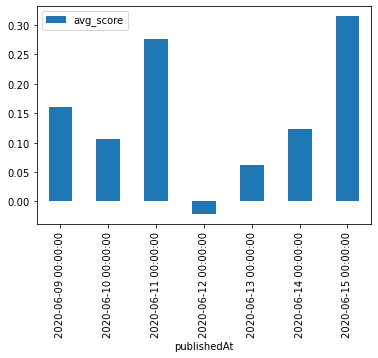

In [33]:
ETH_score = pd.DataFrame(df_clean.loc[(df_clean['ethereum']==True) & (df_clean['avg_score']!=0)]['avg_score'])
ETH_score = ETH_score.resample('D').mean()
ETH_score = ETH_score.sort_index(ascending=True)
ETH_score[-7:].plot(kind='bar')

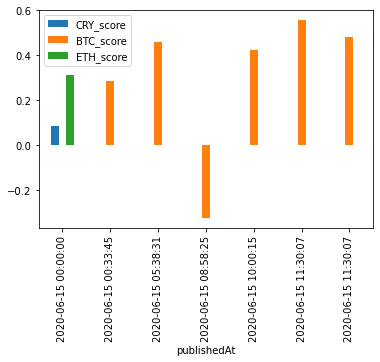

In [34]:
df_scores = CRY_score.merge(BTC_score, how='outer', on='publishedAt', suffixes=('_CRY', '_BTC'))
df_scores = df_scores.merge(ETH_score, how='outer', on='publishedAt', suffixes=('_ETH','_ETH'))
df_scores = df_scores.sort_index(ascending=True)
df_scores = df_scores.rename(columns={'avg_score_CRY': 'CRY_score', 'avg_score_BTC': 'BTC_score', 'avg_score':'ETH_score'})
df_scores[-7:].plot(kind='bar')

In [35]:
df_scores = df_scores.sort_index(ascending=False)

In [42]:
CRY_score.sort_index(ascending=False)

,avg_score
publishedAt,
2020-06-15,0.087033
2020-06-14,0.039745
2020-06-13,0.094739
2020-06-12,0.001260
2020-06-11,0.167884
2020-06-10,0.035379
2020-06-09,0.055973
2020-06-08,0.030235
2020-06-07,0.078233


In [37]:
df_scores.head()

,CRY_score,BTC_score,ETH_score
publishedAt,,,
2020-06-15 11:30:07,NaN,0.481400,NaN
2020-06-15 11:30:07,NaN,0.556833,NaN
2020-06-15 10:00:15,NaN,0.424600,NaN
2020-06-15 08:58:25,NaN,-0.321267,NaN
2020-06-15 05:38:31,NaN,0.460800,NaN


# Exporting DFs

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1322 entries, 2020-04-25 15:14:11 to 2020-06-15 13:00:38
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   source       1322 non-null   object 
 1   source_id    1322 non-null   object 
 2   author       1243 non-null   object 
 3   title        1322 non-null   object 
 4   description  1309 non-null   object 
 5   content      1243 non-null   object 
 6   url          1322 non-null   object 
 7   crypto       1322 non-null   bool   
 8   bitcoin      1322 non-null   bool   
 9   ethereum     1322 non-null   bool   
 10  t_score      1322 non-null   float64
 11  d_score      1322 non-null   float64
 12  c_score      1322 non-null   float64
 13  avg_score    1322 non-null   float64
dtypes: bool(3), float64(4), object(7)
memory usage: 167.8+ KB


In [ ]:
def save_df(df, df_name):
    return df.to_pickle(f'{datetime.datetime.now().strftime("%y%m%d-%H%M%S")}-{df_name}.pkl')

In [ ]:
df_clean.head(1)

In [ ]:
save_df(df_clean, 'df_clean')

In [ ]:
df_source.head(1)

In [ ]:
save_df(df_source, 'df_source')

In [ ]:
df_scores.head()

In [ ]:
save_df(df_scores, 'df_scores')